<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53471 entries, 0 to 53470
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   identifier      53471 non-null  object        
 1   datestamp       53471 non-null  object        
 2   title           53390 non-null  object        
 3   creator         53388 non-null  object        
 4   date            53390 non-null  object        
 5   description     52385 non-null  object        
 6   subject         53378 non-null  object        
 7   publisher       9 non-null      object        
 8   type            50417 non-null  object        
 9   language        43076 non-null  object        
 10  relation        38 non-null     object        
 11  identifier_url  53332 non-null  object        
 12  earliest_date   53390 non-null  datetime64[ns]
 13  update_date     53390 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(12)
memory usage: 5.7+ MB

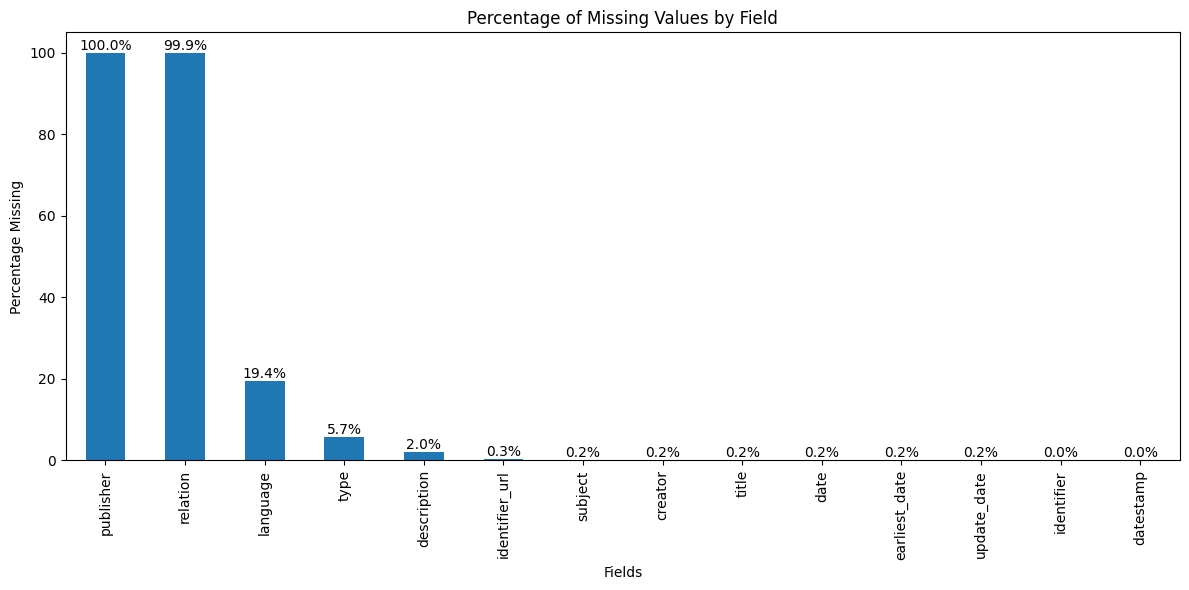

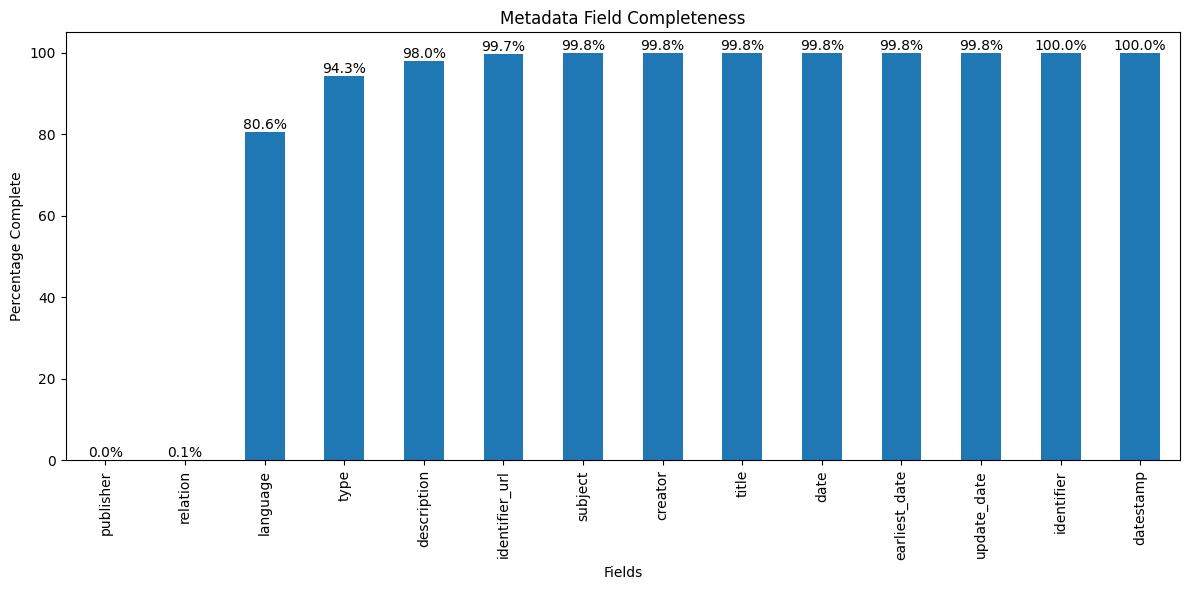

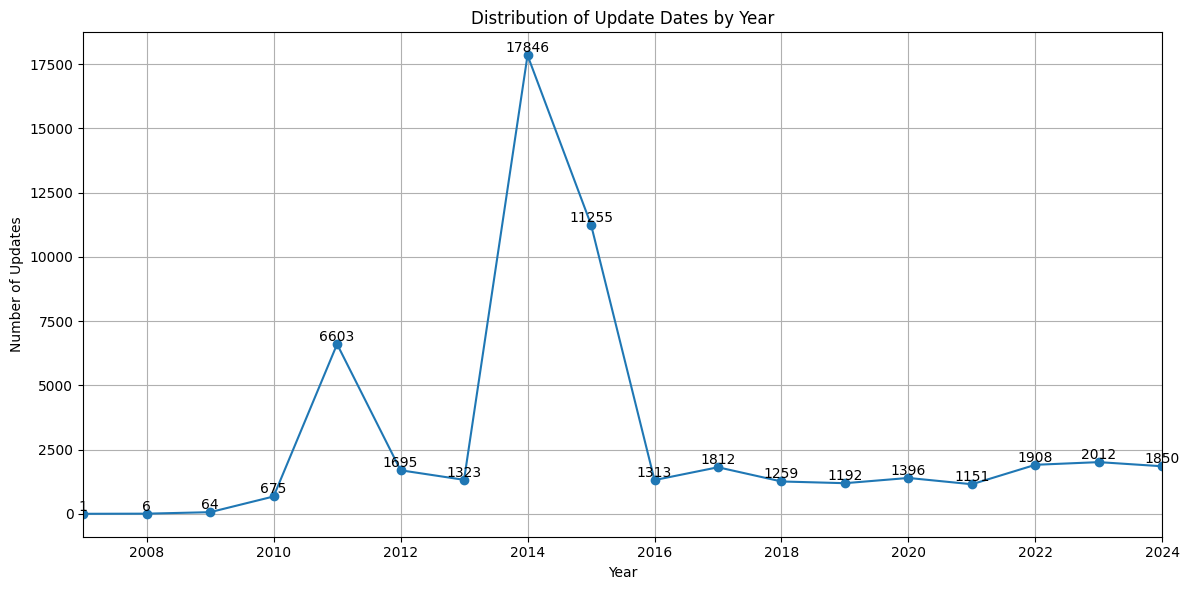

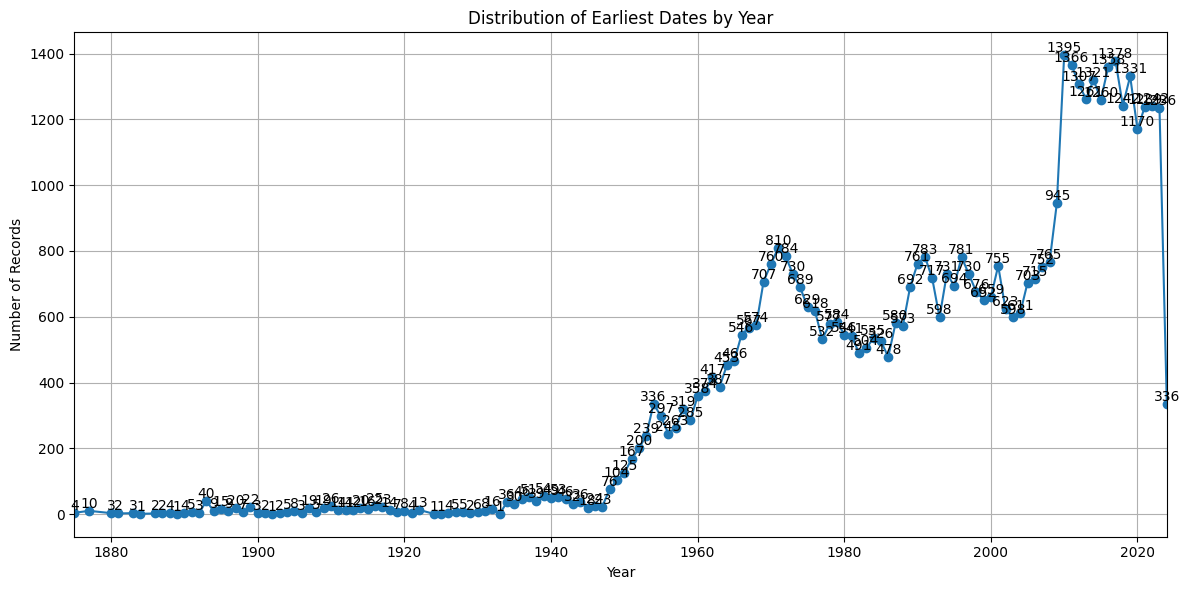

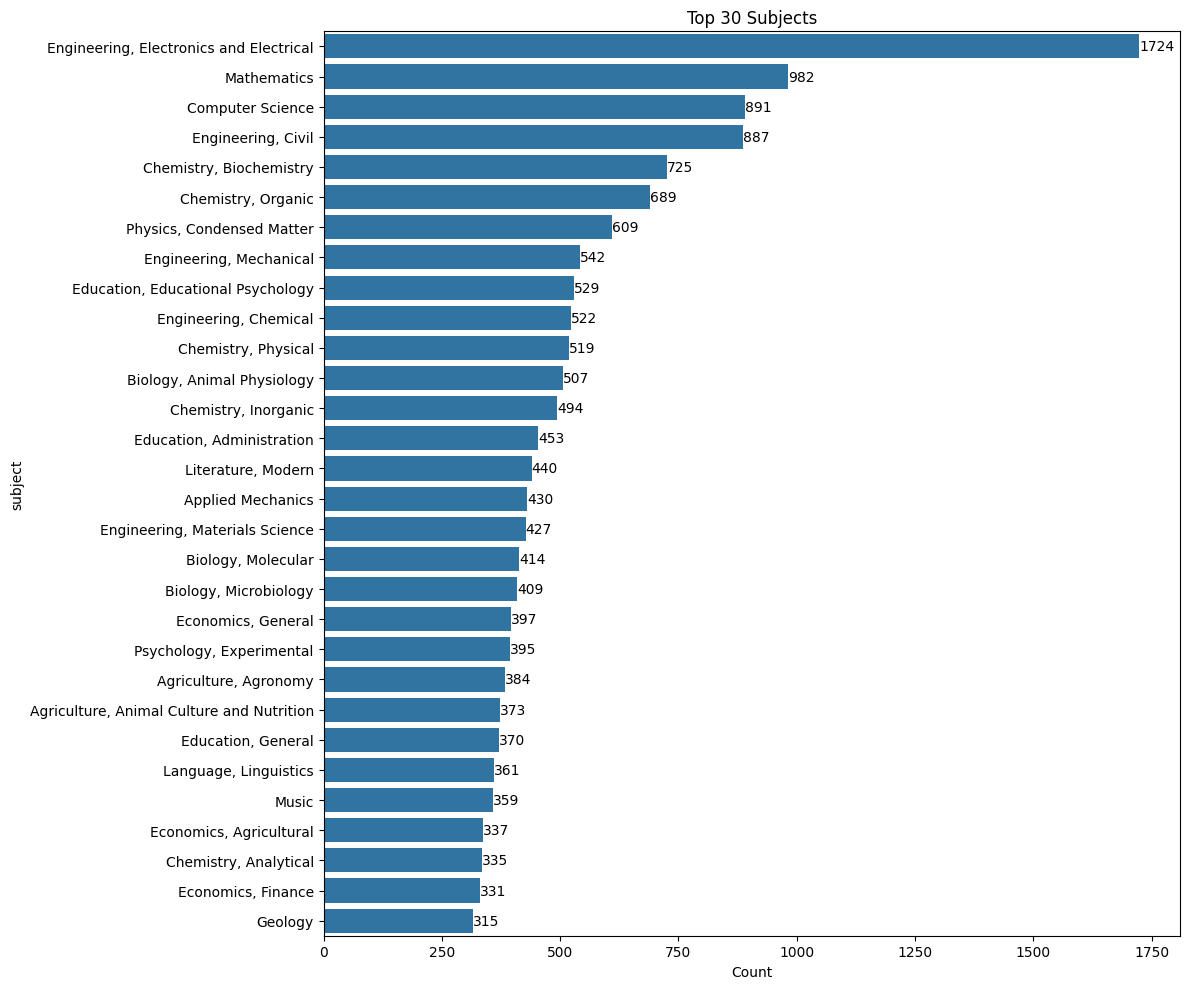


Number of records with future update dates (excluded): 29
Range of excluded future dates: 2025-04-23 05:00:00 to 2128-01-01 06:00:00

Earliest record date: 1875-01-01 00:00:00
Latest record date (before 2025): 2024-09-27 05:00:00


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('uiuc_etd_metadata.csv')

# Function to extract the earliest and latest dates
def extract_dates(date_string):
    if pd.isna(date_string):
        return pd.NaT, pd.NaT
    dates = date_string.split(';')
    valid_dates = []
    for date in dates:
        try:
            parsed_date = pd.to_datetime(date.strip(), errors='coerce')
            if not pd.isna(parsed_date):
                if parsed_date.tzinfo is not None:
                    parsed_date = parsed_date.tz_convert('UTC').tz_localize(None)
                valid_dates.append(parsed_date)
        except:
            continue
    if valid_dates:
        return min(valid_dates), max(valid_dates)
    else:
        return pd.NaT, pd.NaT

# Apply the function to create new 'earliest_date' and 'update_date' columns
df['earliest_date'], df['update_date'] = zip(*df['date'].apply(extract_dates))

# Display basic information about the dataset
print(df.info())

# Calculate percentage of missing values
missing_percentages = (df.isnull().sum() / len(df)) * 100
missing_percentages = missing_percentages.sort_values(ascending=False)

# Print percentage of missing values
print("\nPercentage of missing values:")
for col, percent in missing_percentages.items():
    print(f"{col}: {percent:.2f}%")

# Visualize missing values percentage
plt.figure(figsize=(12, 6))
ax = missing_percentages.plot(kind='bar')
plt.title('Percentage of Missing Values by Field')
plt.ylabel('Percentage Missing')
plt.xlabel('Fields')
plt.xticks(rotation=90)
for i, v in enumerate(missing_percentages):
    ax.text(i, v, f'{v:.1f}%', ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Calculate metadata completeness
completeness = (df.count() / len(df)) * 100

# Visualize completeness
plt.figure(figsize=(12, 6))
ax = completeness.sort_values().plot(kind='bar')
plt.title('Metadata Field Completeness')
plt.ylabel('Percentage Complete')
plt.xlabel('Fields')
plt.xticks(rotation=90)
for i, v in enumerate(completeness.sort_values()):
    ax.text(i, v, f'{v:.1f}%', ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Filter out future dates and dates before a reasonable start year (e.g., 1990)
current_year = 2024  # Set to 2024 as per your request
df['update_date_filtered'] = df['update_date'].where((df['update_date'].dt.year <= current_year) & 
                                                     (df['update_date'].dt.year >= 1990))

# Analyze update dates distribution
update_years = df['update_date_filtered'].dt.year.value_counts().sort_index()

plt.figure(figsize=(12, 6))
ax = update_years.plot(kind='line', marker='o')
plt.title('Distribution of Update Dates by Year')
plt.xlabel('Year')
plt.ylabel('Number of Updates')
plt.xlim(min(update_years.index), current_year)  # Set x-axis limits
for i, v in update_years.items():
    ax.text(i, v, str(v), ha='center', va='bottom')
plt.grid(True)
plt.tight_layout()
plt.show()

# Analyze earliest dates distribution
earliest_years = df['earliest_date'].dt.year.value_counts().sort_index()

plt.figure(figsize=(12, 6))
ax = earliest_years.plot(kind='line', marker='o')
plt.title('Distribution of Earliest Dates by Year')
plt.xlabel('Year')
plt.ylabel('Number of Records')
plt.xlim(min(earliest_years.index), current_year)  # Set x-axis limits
for i, v in earliest_years.items():
    ax.text(i, v, str(v), ha='center', va='bottom')
plt.grid(True)
plt.tight_layout()
plt.show()

# Analyze subject distribution
if 'subject' in df.columns:
    # Split multiple subjects and flatten the list
    all_subjects = df['subject'].str.split(';').explode()
    
    # Count occurrences of each subject
    subject_counts = all_subjects.value_counts()
    
    # Get top 30 subjects
    top_subjects = subject_counts.head(30)
    
    plt.figure(figsize=(12, 10))
    ax = sns.barplot(x=top_subjects.values, y=top_subjects.index)
    plt.title('Top 30 Subjects')
    plt.xlabel('Count')
    for i, v in enumerate(top_subjects.values):
        ax.text(v, i, str(v), va='center')
    plt.tight_layout()
    plt.show()

# Print statistics about excluded data
future_dates = df[df['update_date'].dt.year > current_year]
print(f"\nNumber of records with future update dates (excluded): {len(future_dates)}")
if not future_dates.empty:
    print(f"Range of excluded future dates: {future_dates['update_date'].min()} to {future_dates['update_date'].max()}")

# Add information about earliest and latest record dates
earliest_record = df['earliest_date'].min()
latest_record = df['update_date'][df['update_date'].dt.year <= current_year].max()

print(f"\nEarliest record date: {earliest_record}")
print(f"Latest record date (before 2025): {latest_record}")

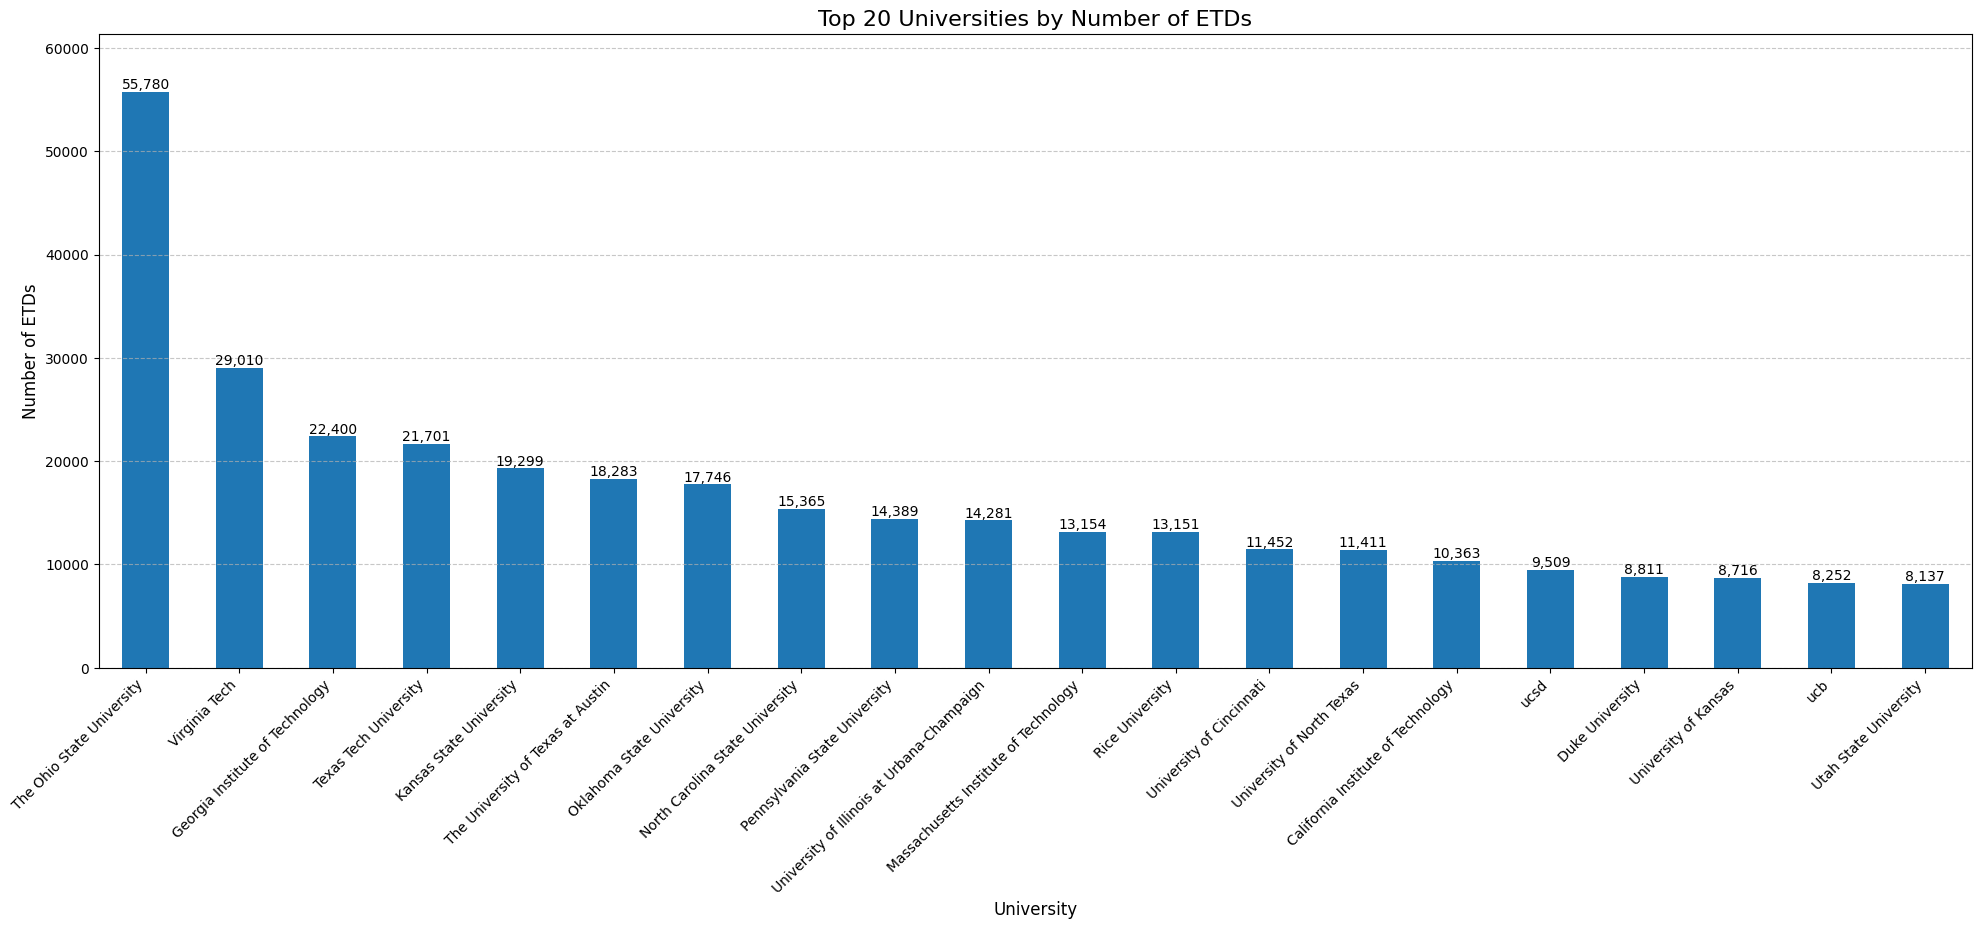

university
The Ohio State University                     55780
Virginia Tech                                 29010
Georgia Institute of Technology               22400
Texas Tech University                         21701
Kansas State University                       19299
The University of Texas at Austin             18283
Oklahoma State University                     17746
North Carolina State University               15365
Pennsylvania State University                 14389
University of Illinois at Urbana-Champaign    14281
Massachusetts Institute of Technology         13154
Rice University                               13151
University of Cincinnati                      11452
University of North Texas                     11411
California Institute of Technology            10363
ucsd                                           9509
Duke University                                8811
University of Kansas                           8716
ucb                                            8252
U

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your dataframe
# Get top 20 universities
top_universities = df['university'].value_counts().head(20)

plt.figure(figsize=(20, 10))
ax = top_universities.plot(kind='bar')

plt.title('Top 20 Universities by Number of ETDs', fontsize=16)
plt.xlabel('University', fontsize=12)
plt.ylabel('Number of ETDs', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for i, v in enumerate(top_universities):
    ax.text(i, v, f'{v:,}', ha='center', va='bottom', fontsize=10)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Add some extra space at the top for the labels
plt.subplots_adjust(top=0.9)

# Increase y-axis limit slightly to accommodate labels
plt.ylim(0, max(top_universities) * 1.1) 

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print the data
print(top_universities)

# Print total number of unique subjects
print(f"\nTotal number of unique subjects: {df[subject_column].nunique()}")

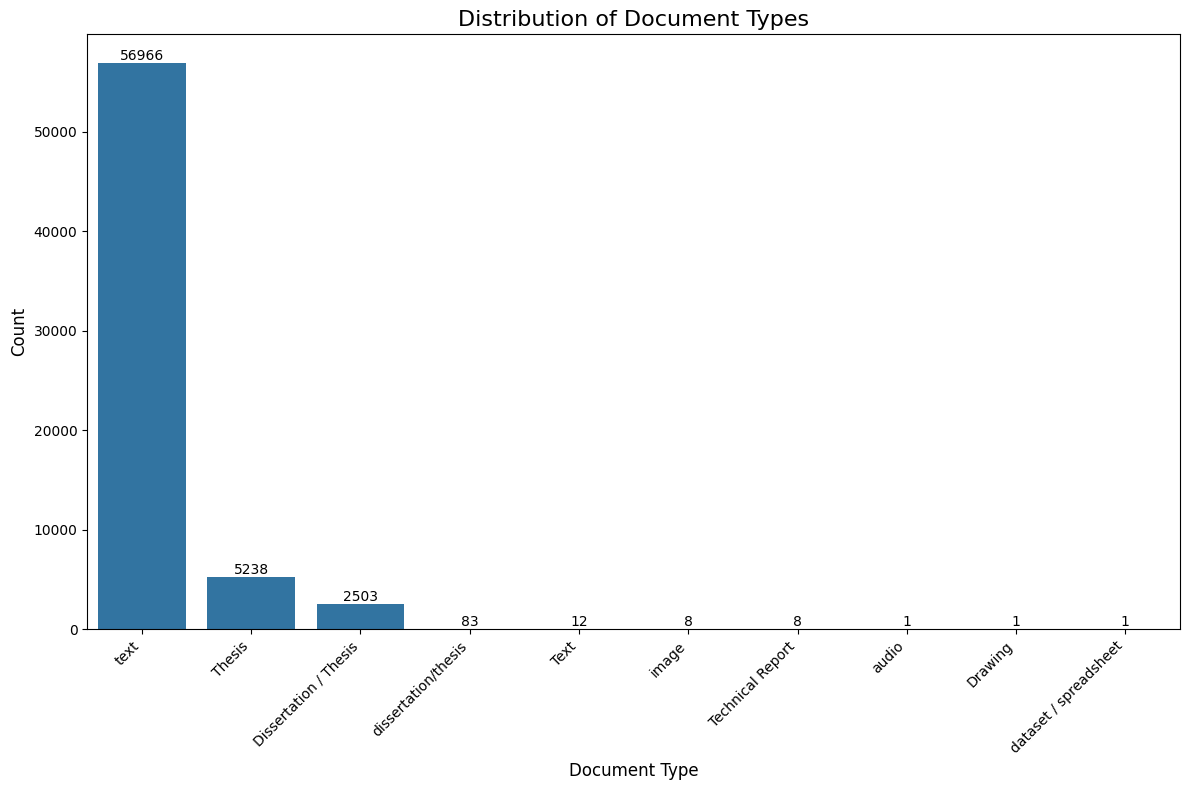

Percentages of each document type:
text: 87.88%
Thesis: 8.08%
Dissertation / Thesis: 3.86%
dissertation/thesis: 0.13%
Text: 0.02%
image: 0.01%
Technical Report: 0.01%
audio: 0.00%
Drawing: 0.00%
dataset / spreadsheet: 0.00%


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dictionary of document types and their counts
doc_types = {
    'text': 56966,
    'Thesis': 5238,
    'Dissertation / Thesis': 2503,
    'dissertation/thesis': 83,
    'Text': 12,
    'image': 8,
    'Technical Report': 8,
    'audio': 1,
    'Drawing': 1,
    'dataset / spreadsheet': 1
}

# Create a DataFrame from the dictionary
df_types = pd.DataFrame.from_dict(doc_types, orient='index', columns=['count'])
df_types = df_types.sort_values('count', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=df_types.index, y='count', data=df_types)

# Customize the plot
plt.title('Distribution of Document Types', fontsize=16)
plt.xlabel('Document Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels on the bars
for i, v in enumerate(df_types['count']):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Print out the percentages
total = df_types['count'].sum()
print("Percentages of each document type:")
for index, row in df_types.iterrows():
    percentage = (row['count'] / total) * 100
    print(f"{index}: {percentage:.2f}%")

/var/folders/n8/pd7j7g0j3673x8rwthf6b1dh0000gn/T/ipykernel_4376/3657174264.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  period_subj_percentages = df_filtered[df_filtered['subject'].isin(top_subjects)].groupby(['period', 'subject']).size().unstack()


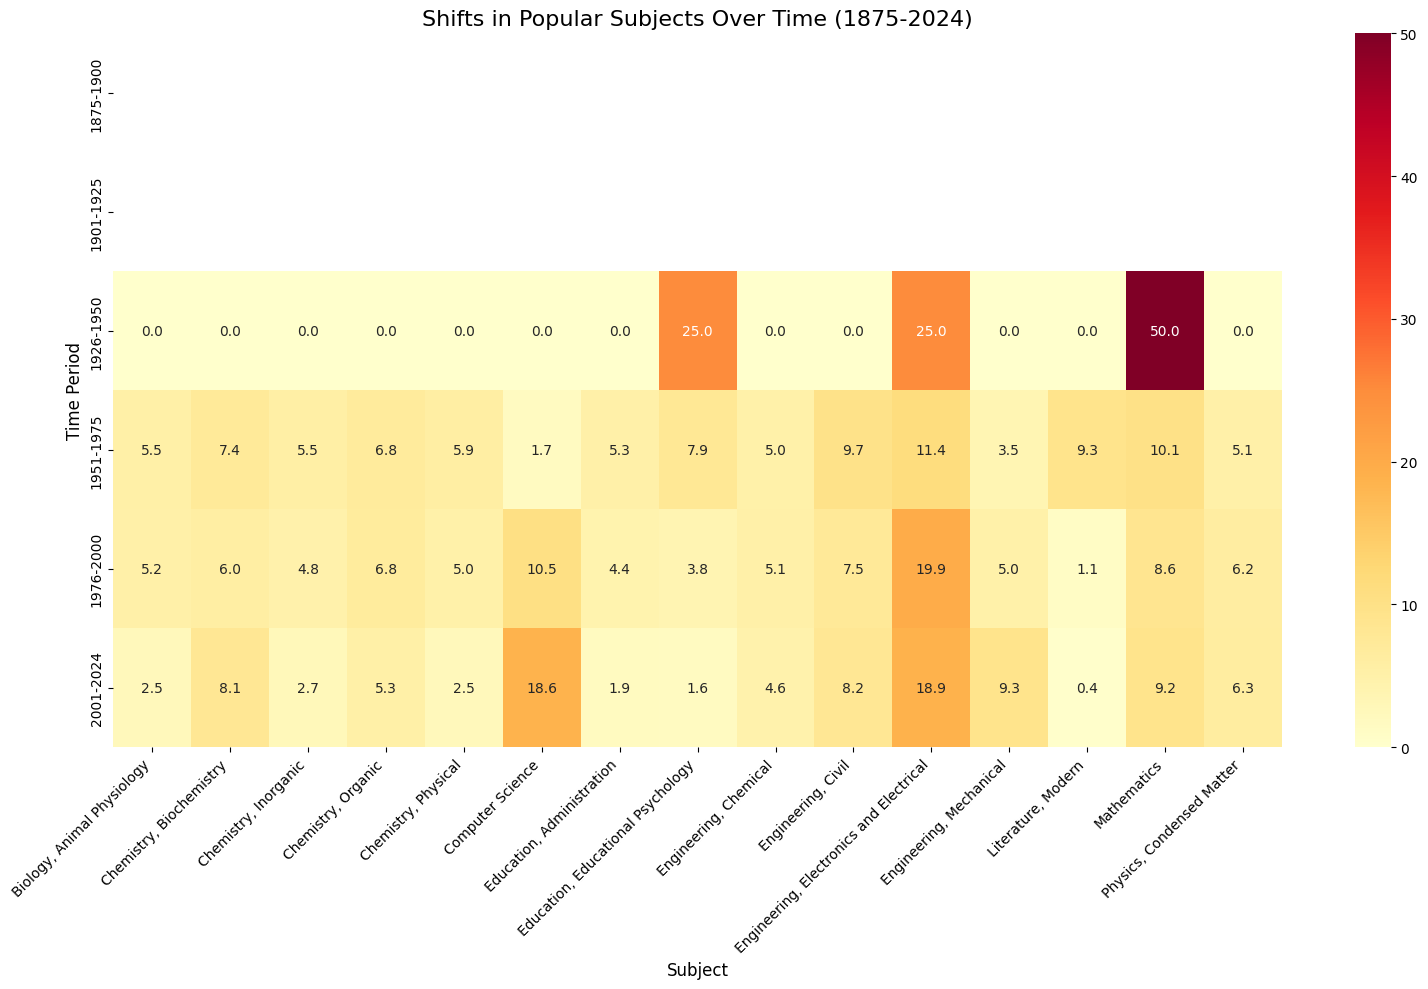

Subjects with the largest increase in popularity:
subject
Biology, Animal Physiology   NaN
Chemistry, Biochemistry      NaN
Chemistry, Inorganic         NaN
Chemistry, Organic           NaN
Chemistry, Physical          NaN
dtype: float64

Subjects with the largest decrease in popularity:
subject
Biology, Animal Physiology   NaN
Chemistry, Biochemistry      NaN
Chemistry, Inorganic         NaN
Chemistry, Organic           NaN
Chemistry, Physical          NaN
dtype: float64


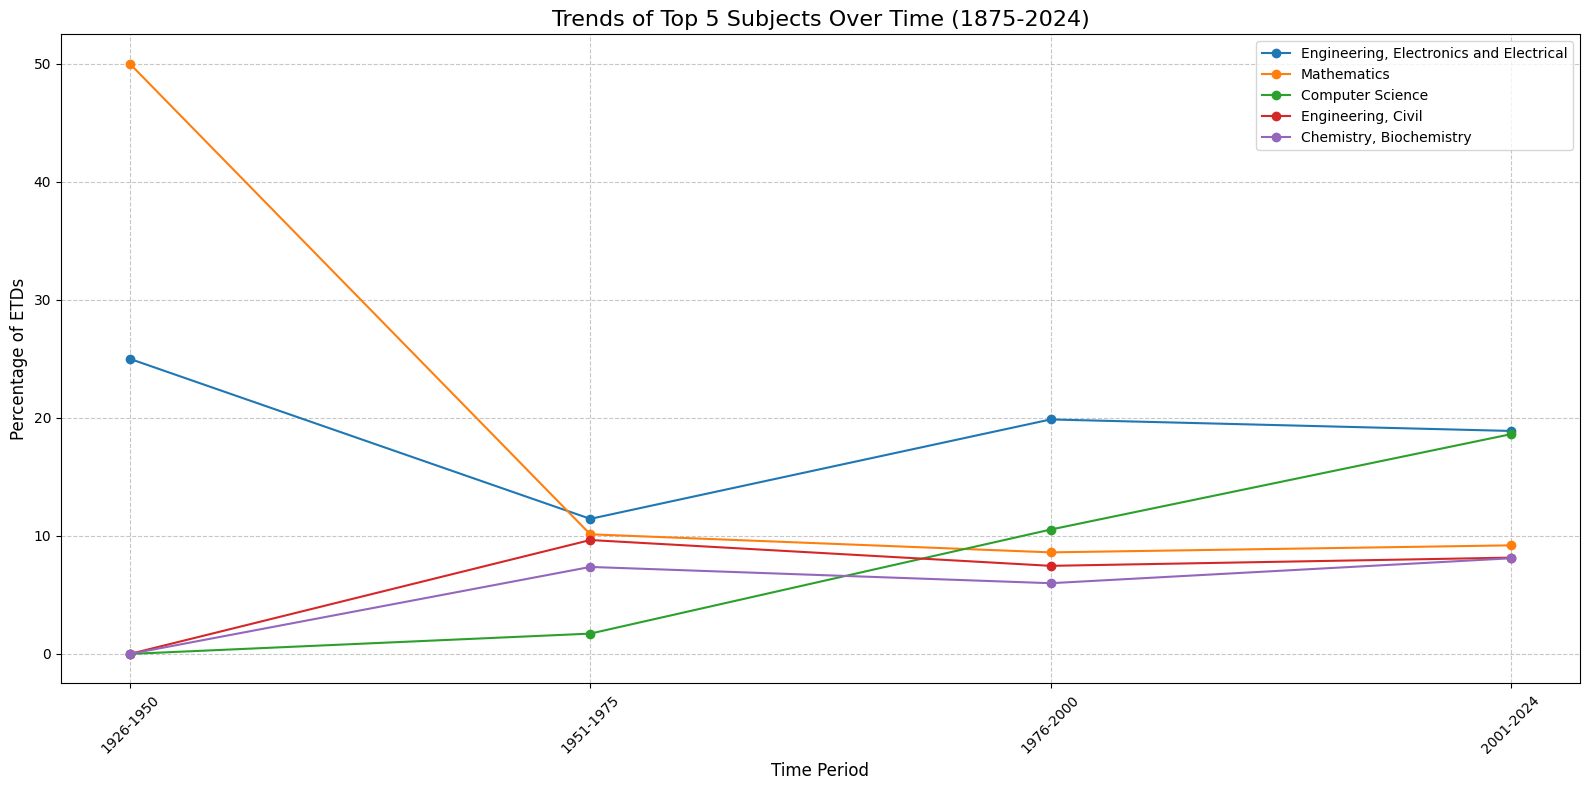


Number of ETDs in each time period:
period
1875-1900       283
1901-1925       574
1926-1950      1724
1951-1975     13394
1976-2000     25854
2001-2024    110805
Name: count, dtype: int64


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'earliest_date' to datetime if it's not already
df['earliest_date'] = pd.to_datetime(df['earliest_date'])

# Extract year from earliest_date
df['year'] = df['earliest_date'].dt.year

# Filter out any rows with NaT in year and years outside our range
df_filtered = df[(df['year'] >= 1875) & (df['year'] <= 2024)].dropna(subset=['year'])

# Create time periods
df_filtered['period'] = pd.cut(df_filtered['year'], 
                               bins=[1875, 1900, 1925, 1950, 1975, 2000, 2024],
                               labels=['1875-1900', '1901-1925', '1926-1950', '1951-1975', '1976-2000', '2001-2024'])

# Split subjects (assuming they're semicolon-separated)
df_filtered['subject'] = df_filtered['subject'].str.split(';')
df_filtered = df_filtered.explode('subject')

# Get top 15 subjects overall
top_subjects = df_filtered['subject'].value_counts().nlargest(15).index

# Calculate percentage of ETDs for each subject in each period
period_subj_percentages = df_filtered[df_filtered['subject'].isin(top_subjects)].groupby(['period', 'subject']).size().unstack()
period_subj_percentages = period_subj_percentages.div(period_subj_percentages.sum(axis=1), axis=0) * 100

# Plot heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(period_subj_percentages, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Shifts in Popular Subjects Over Time (1875-2024)', fontsize=16)
plt.ylabel('Time Period', fontsize=12)
plt.xlabel('Subject', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Calculate and print the subjects with the biggest increase and decrease
first_period = period_subj_percentages.iloc[0]
last_period = period_subj_percentages.iloc[-1]
changes = last_period - first_period

print("Subjects with the largest increase in popularity:")
print(changes.nlargest(5))
print("\nSubjects with the largest decrease in popularity:")
print(changes.nsmallest(5))

# Plot line graph for top 5 subjects
plt.figure(figsize=(16, 8))
top_5_subjects = df_filtered['subject'].value_counts().nlargest(5).index

for subj in top_5_subjects:
    subj_data = period_subj_percentages[subj]
    plt.plot(subj_data.index, subj_data.values, marker='o', label=subj)

plt.title('Trends of Top 5 Subjects Over Time (1875-2024)', fontsize=16)
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Percentage of ETDs', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the number of ETDs in each time period
etds_per_period = df_filtered['period'].value_counts().sort_index()
print("\nNumber of ETDs in each time period:")
print(etds_per_period)